# UCIHAR EDA

In [1]:
# Imports
import numpy as np
import pandas as pd
import re # for parsing files
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer

In [2]:
# Need to convert to float from scientific num notation
def sci2float(string_rep):
    '''Convert string of the form "x.xxxxe+/-xxx" to a float'''
    try:
        return float(string_rep) # normally just works
    except:
        parts = re.split(r'e', string_rep)
        coeff = float(parts[0])
        if parts[1] == '':
            return coeff
        else:
            exponent = int(parts[1])
            return coeff*10**exponent

Main function for scraping the .txt files. Each row represents one time window of observations for each sensor. e.g the first row of body_acc_x_test.txt is the first 128 measurements of that sensor. Some of the rows have more than 128 values so I've just taken the first 128 values (not sure this is the best approach).

In [8]:
BASE_PATH = '../Data/UCI HAR/UCI HAR Dataset/'
def construct_UCIHAR(path, isTest = False):
    """Builds dataframe for UCI dataset. Either test or train set based on isTest variable.
    
    Args:
        path: (str) path to UCIHAR dataset folder, which should have following structure:
            test
               |---Inertial Signals
               |   |---body_acc_x_test.txt
               |   |---...
               |   |---total_acc_z_test.txt
               |---subject_test.txt
            train
               |---Ìnertial Signals
               |   |---body_acc_x_train.txt
               |   |---...
               |   |---total_acc_z_test.txt
               |---subject_train.txt
        isTest: (bool) if true, gets the test set data, else gets training data. 
        
    Returns:
        data: pandas dataframe with following columns:
            Subject: the subject whose activity is being measured
            X_acc: array representing the X accelerometer signal over 128 measurements
            Y_acc: see above
            Z _acc: see above
            X_gyr: array representing the X gyroscope signal over 128 measurements
            Y_gyr: see above
            Z_gyr: see above
            X_tot: array representing the Z
            Y_tot:
            Z_tot: 
            Activity: the activity label of the 128 measurement interval.
            Each row gives us the data from a timewindow of 2.56 seconds (128 measurements at 50Hz) with
            the activity at that time.
    """
    if isTest:
        base_path = path + 'test/'
        suffix = '_test.txt'
    else:
        base_path = path + 'train/'
        suffix = '_train.txt'

    sub_paths = ['subject',
                 'Inertial Signals/body_acc_x',
                 'Inertial Signals/body_acc_y', 
                 'Inertial Signals/body_acc_z',
                 'Inertial Signals/body_gyro_x',
                 'Inertial Signals/body_gyro_y',
                 'Inertial Signals/body_gyro_z',
                 'Inertial Signals/total_acc_x',
                 'Inertial Signals/total_acc_y', 
                 'Inertial Signals/total_acc_z',
                 'y']
    
    colnames = ['Subject', 'X_acc', 'Y_acc', 'Z_acc', 'X_gyr', 'Y_gyr', 'Z_gyr', 'X_tot', 'Y_tot', 'Z_tot', 'Activity']
    datafiles = [base_path + sub_path + suffix for sub_path in sub_paths]
    cols = {col: None for col in colnames}
    for i, filepath in enumerate(datafiles):
        column = []
        with open(filepath) as file:
            for entry in file:
                data = re.findall(r'[\w\d.-]+', entry)
                if len(data) == 1:
                    column.append(data[0])
                else:
                    data_conv = np.array([sci2float(point) for point in data][:128])
                    column.append(data_conv)
        cols[colnames[i]] = column
        
    data = pd.DataFrame.from_dict(cols)
    return data

Then to construct the sensor dataframes, just do:

In [9]:
train_data = construct_UCIHAR(BASE_PATH)
test_data = construct_UCIHAR(BASE_PATH, isTest = True)

In [10]:
train_data.head()

,Subject,X_acc,Y_acc,Z_acc,X_gyr,Y_gyr,Z_gyr,X_tot,Y_tot,Z_tot,Activity
0,1,"[0.0001808515, 0.01013856, 0.009275574, 0.0050...","[0.01076681, 0.00657948, 0.008928878, 0.007488...","[0.05556068, 0.05512483, 0.04840473, 0.0497749...","[0.03019122, 0.04371071, 0.0356878, 0.0404021,...","[0.06601362, 0.04269897, 0.07485018, 0.0573197...","[0.02285864, 0.01031572, 0.01324969, 0.0177512...","[1.012817, 0.0, 1.022833, 0.0, 1.022028, 0.0, ...","[-0.1232167, -0.1268756, -0.1240037, -0.124927...","[0.1029341, 0.1056872, 0.1021025, 0.1065527, 0...",5
1,1,"[0.001093752, 0.004550077, 0.002879173, 0.0022...","[-0.004687588, -0.007487894, -0.008429991, -0....","[-0.02685954, -0.02509841, -0.02597534, -0.026...","[0.01711106, 0.02417851, 0.03022889, 0.0320285...","[0.006122797, 0.009710357, 0.01032192, 0.01341...","[0.01226815, 0.01614958, 0.01589471, 0.0126711...","[1.018851, 0.0, 1.02238, 0.0, 1.020781, 0.0, 1...","[-0.123976, -0.1268078, -0.1277862, -0.1266547...","[0.09792958, 0.09935086, 0.09811381, 0.0975171...",5
2,1,"[0.003531266, 0.002285063, -0.0004197538, -0.0...","[0.004455942, 0.003045876, 0.001776179, 0.0009...","[-0.005914581, -0.004138911, -0.0005428851, 0....","[0.02618877, 0.02165149, 0.01455062, 0.0148146...","[-0.000238341, -0.0004275982, 0.000761135, -0....","[0.002158897, -0.0002724752, 0.002630986, 0.00...","[1.023127, 0.0, 1.021882, 0.0, 1.019178, 0.0, ...","[-0.1200157, -0.1214994, -0.1228407, -0.123717...","[0.09111667, 0.0926756, 0.09606378, 0.09989713...",5
3,1,"[-0.001772352, -0.001311448, 0.0003876795, 0.0...","[-0.01018541, -0.01125254, -0.0121963, -0.0111...","[0.001053255, 0.001227295, -0.006004362, -0.00...","[-0.03751574, -0.033097, -0.03036013, -0.02500...","[-0.01288632, -0.01691822, -0.01618518, -0.012...","[-0.0008727416, -0.00548197, -0.00467823, -0.0...","[1.017682, 0.0, 1.018149, 0.0, 1.019854, 0.0, ...","[-0.1334039, -0.1343639, -0.1352028, -0.134048...","[0.0951518, 0.09541539, 0.08827355, 0.08632477...",5
4,1,"[8.747685e-05, -0.0002719175, 0.001022103, 0.0...","[-0.003856929, -0.002837935, -0.003086418, -0....","[-0.01333336, -0.01494756, -0.01567863, -0.009...","[-0.01942932, -0.01909099, -0.01481631, -0.013...","[-0.008612378, -0.008146719, -0.00537662, -0.0...","[-0.00157401, 0.0002007077, -0.0009700938, -0....","[1.019952, 0.0, 1.019616, 0.0, 1.020933, 0.0, ...","[-0.1287306, -0.1278461, -0.12823, -0.1298541,...","[0.0808414, 0.07912684, 0.07829138, 0.08406305...",5


We need to apply one hot encoding to the labels:

In [11]:
label_encoder = LabelBinarizer()
train_labels = label_encoder.fit_transform(train_data['Activity'])
train_labels

array([[0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0],
       ...,
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0]])

Need to carry over this transform so we have a key of which activity is which vector representation (by using label_encoder.inverse_transform)

## Creating activity image

In [12]:
# Implementation of Jiang and Yin's algorithm
def layering_alg(signals):
    i = 0
    j = i + 1
    Ns = len(signals)
    SI = [signals[i]]
    SIS = str(i)
    while len(SIS) < Ns*(Ns-1)/2:
        while i != j:
            if j > Ns - 1:
                j = 0
            elif (str(i) + str(j) not in SIS) and (str(j) + str(i) not in SIS) and (i != j):
                SI.append(signals[j])
                SIS += str(j)
                i = int(SIS[-1])
                j = i + 1
            else:
                j = j + 1
        i += 1
    return np.array(SI)

In [13]:
len(layering_alg(range(9)))

37

Now we generate the base activity image arrays row by row over the dataframe.

In [14]:
columns = ['X_acc', 'Y_acc', 'Z_acc', 'X_gyr', 'Y_gyr', 'Z_gyr', 'X_tot', 'Y_tot', 'Z_tot']

def activity_image(row, columns):
    indices = layering_alg(columns)[:-1]
    activity_image = np.vstack([row[col] for col in indices])
    return activity_image

# train_data['activity_image'] = train_data.apply(lambda row: activity_image(row, columns), axis = 1)
train_features = np.empty(shape = (len(train_data), 36, 128))
for i, window in train_data.iterrows():
    train_features[i, :, :] = activity_image(window, columns)

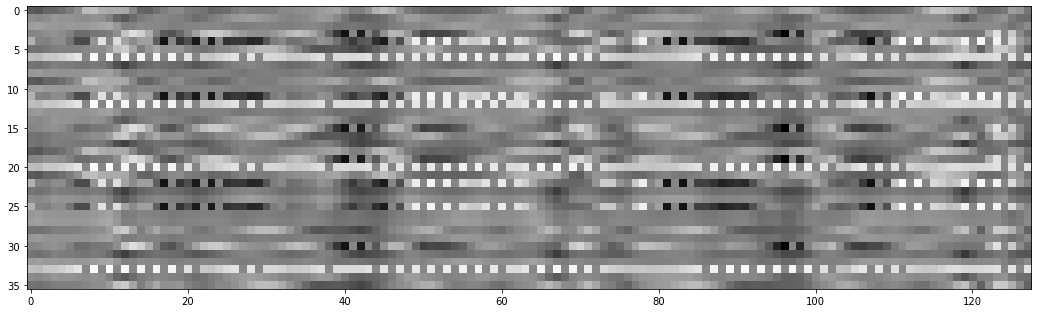

In [15]:
plt.figure(figsize = (18, 7))
plt.imshow(-train_features[100], cmap = 'Greys')
plt.show()

## Applying Fourier Transform
Need to apply the 2D discrete fourier transform and take the absolute value, since result is complex and we want the magnitude. The shape of the output of this is the same as the input. By default `np.fft.fft2` uses the last two dimensions, which is what we want.

In [16]:
train_features_fft = np.abs(np.fft.fft2(train_features))

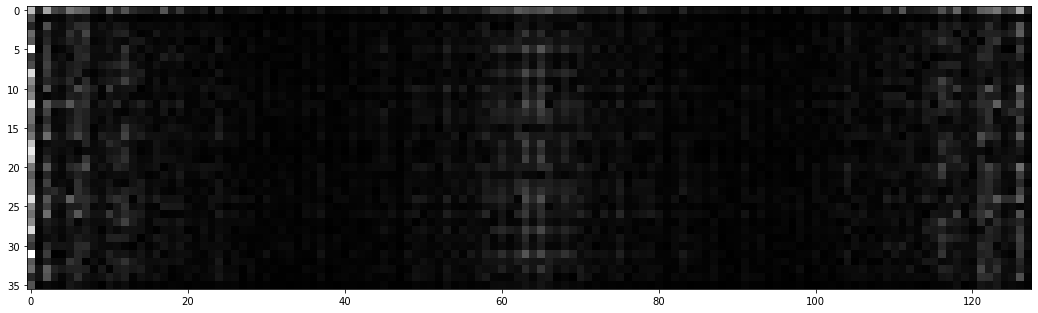

In [17]:
plt.figure(figsize = (18, 7))
plt.imshow(-train_features_fft[100], cmap = 'Greys') # negative so the darker values represent higher numbers.
plt.show()

Some images look less interesting since the values are so small, so when you plot as image most of the values go to 0. This isn't a problem (I don't think). For example:

[2.70680630e+02 1.46946698e+01 7.43824836e+00 4.86077705e+00
 5.08602966e+00 2.75182188e+00 2.52737309e+00 2.73102394e+00
 2.73612354e+00 8.74957552e-01 1.55879799e+00 1.56894688e+00
 1.37741090e+00 5.52211054e-01 1.20342205e+00 5.24817568e-01
 4.02251303e-01 6.38655936e-01 1.16694381e+00 4.95318823e-01
 5.45574261e-01 5.70792799e-01 6.82680323e-01 1.27197650e+00
 1.01872554e+00 4.45993675e-01 3.08730338e-01 5.44750419e-01
 8.05053903e-01 5.84600633e-01 1.46558485e-01 7.16332851e-01
 4.19016200e-01 4.64670467e-01 6.98076644e-01 3.35296704e-01
 5.18531482e-01 1.51365169e-01 2.79280171e-01 3.04116472e-01
 3.25282502e-01 2.24065623e-01 2.10203116e-01 4.01921364e-01
 3.97092408e-01 4.45123311e-01 3.20562886e-01 6.17445954e-01
 4.27176391e-01 7.50033064e-01 8.45911726e-01 8.79467116e-01
 5.80869333e-01 5.68711786e-01 3.01247437e-01 2.98580444e-01
 3.26861157e-01 3.30400317e-01 3.06283983e-01 3.38368451e-01
 2.67772712e-01 3.16661922e-01 3.30081853e-01 3.18616407e-01
 2.61260784e+02 3.186164

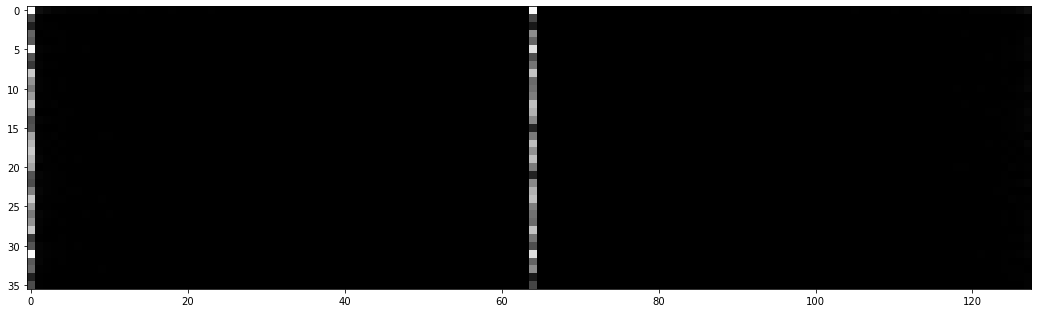

In [18]:
print(train_features_fft[0][0]) # top row of the first image.
plt.figure(figsize = (18, 7))
plt.imshow(-train_features_fft[0], cmap = 'Greys')
plt.show()

Now our final features and labels, which will be fed into our CNN and LSTM models, are `train_features_fft` and `train_labels` respectively. The approach with the dataframe as the intermediate step isn't important, so long as the final results are in this form. Just did it that way to help me understand the data.

In [19]:
print(train_features_fft.shape)
print(train_labels.shape)

(7352, 36, 128)
(7352, 6)


## Saving the models

First we want to apply the same process to our test data:

In [20]:
test_features = np.empty(shape = (len(test_data), 36, 128))
for i, window in test_data.iterrows():
    test_features[i, :, :] = activity_image(window, columns)
    
test_features_fft = np.abs(np.fft.fft2(train_features))

In [21]:
test_labels = label_encoder.transform(test_data['Activity'])

Now save the models:

In [22]:
np.save('UCI_train_features.npy', train_features_fft)
np.save('UCI_train_labels.npy', train_labels)
np.save('UCI_test_features.npy', test_features_fft)
np.save('UCI_test_labels.npy', test_labels)

To load data, simply do:

In [23]:
reloaded_train_features_fft = np.load('UCI_train_features.npy')
print(reloaded_train_features_fft == train_features_fft) # Show they are identical

[[[ True  True  True ...  True  True  True]
  [ True  True  True ...  True  True  True]
  [ True  True  True ...  True  True  True]
  ...
  [ True  True  True ...  True  True  True]
  [ True  True  True ...  True  True  True]
  [ True  True  True ...  True  True  True]]

 [[ True  True  True ...  True  True  True]
  [ True  True  True ...  True  True  True]
  [ True  True  True ...  True  True  True]
  ...
  [ True  True  True ...  True  True  True]
  [ True  True  True ...  True  True  True]
  [ True  True  True ...  True  True  True]]

 [[ True  True  True ...  True  True  True]
  [ True  True  True ...  True  True  True]
  [ True  True  True ...  True  True  True]
  ...
  [ True  True  True ...  True  True  True]
  [ True  True  True ...  True  True  True]
  [ True  True  True ...  True  True  True]]

 ...

 [[ True  True  True ...  True  True  True]
  [ True  True  True ...  True  True  True]
  [ True  True  True ...  True  True  True]
  ...
  [ True  True  True ...  True  True  Tr